# Del 5: Strojno učenje: Linearna regresija

## The Linear Regression Model

### Instance Based Learning Vs. Model Based Learning

###  Introduction To The Data

In [1]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")

In [2]:
train = data[0:1460]
test = data[1460:]

In [3]:
#train.info()
target = 'SalePrice'

### Simple Linear Regression

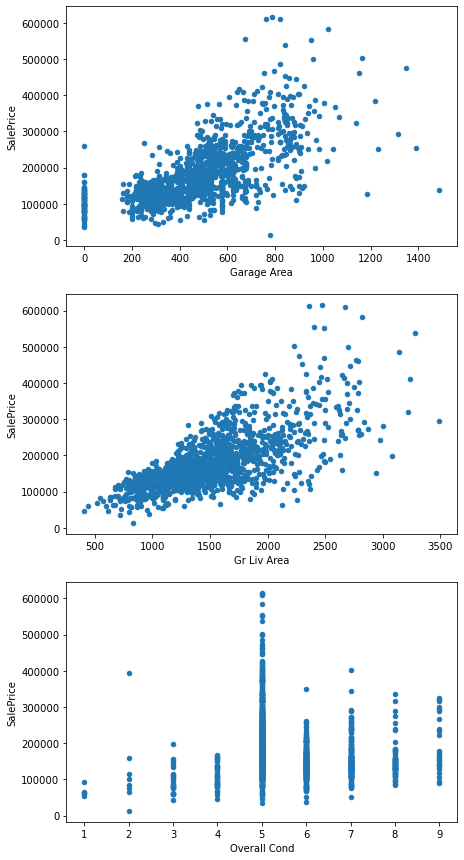

In [4]:
import matplotlib.pyplot as plt
import seaborn

fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [5]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000

### Least Squares

**Residual Sum Of Squares**

<p><img src="https://s3.amazonaws.com/dq-content/235/rss.gif"></p>

### Using Scikit-Learn To Train And Predict

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train[['Gr Liv Area']], train['SalePrice'])

LinearRegression()

In [8]:
lr.coef_

array([116.86624683])

In [9]:
lr.intercept_

5366.821710056043

### Making Predictions

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [11]:
test_predictions = lr.predict(test[['Gr Liv Area']])

In [12]:
test_mse = mean_squared_error(test_predictions, test['SalePrice'])
test_rmse = np.sqrt(test_mse)
print(test_rmse)

57088.25161263909


### Multiple Linear Regression

In [13]:
lr = LinearRegression()
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
test_predictions = lr.predict(test[cols])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])
test_rmse = np.sqrt(test_mse)
print(test_rmse)




57066.90779448559


## Feature Selection

### Missing Values

In [14]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [15]:
numerical_train = train.select_dtypes(include=['int', 'float'])

In [16]:
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)

In [17]:
null_series = numerical_train.isnull().sum()

In [18]:
full_cols_series = null_series[null_series == 0]

In [19]:
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

### Correlating Feature Columns With Target Column

In [20]:
len(full_cols_series)

25

In [22]:
pd.__version__

'1.1.2'

In [23]:
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()

In [24]:
corrmat

Order  MS SubClass  Lot Area  Overall Qual  Overall Cond  \
Order            1.000000    -0.023140  0.020064     -0.049116      0.078547   
MS SubClass     -0.023140     1.000000 -0.248209      0.054533     -0.099862   
Lot Area         0.020064    -0.248209  1.000000      0.100290     -0.010353   
Overall Qual    -0.049116     0.054533  0.100290      1.000000     -0.083581   
Overall Cond     0.078547    -0.099862 -0.010353     -0.083581      1.000000   
1st Flr SF      -0.060288    -0.273248  0.295995      0.490056     -0.154903   
2nd Flr SF       0.011011     0.342229  0.005407      0.200105     -0.009733   
Low Qual Fin SF  0.016425    -0.001077 -0.013667     -0.070362     -0.015807   
Gr Liv Area     -0.036472     0.089580  0.239224      0.562903     -0.133710   
Full Bath       -0.074932     0.168263  0.107753      0.505102     -0.223043   
Half Bath       -0.057901     0.223105  0.011162      0.260307     -0.115307   
Bedroom AbvGr    0.014836    -0.024091  0.135366      0.045648      0.002333   
Kitchen AbvGr    0.005159     0.299163 -0.029323     -0.175562     -0.095837   
TotRms AbvGrd   -0.029653     0.054067  0.205604      0.360203     -0.116560   
Fireplaces      -0.055643    -0.064293  0.232112      0.386205     -0.056623   
Garage Cars     -0.058123    -0.046967  0.166939      0.609088     -0.156004   
Garage Area     -0.051493    -0.110141  0.179216      0.581106     -0.132401   
Wood Deck SF    -0.064436    -0.034953  0.110003      0.260258      0.045171   
Open Porch SF    0.035471     0.000592  0.044313      0.319954     -0.013770   
Enclosed Porch   0.013040     0.009778  0.002098     -0.173024      0.052764   
3Ssn Porch       0.006725    -0.051771  0.022090      0.032751      0.033923   
Screen Porch     0.026088    -0.065956  0.054119      0.023194      0.064596   
Pool Area        0.020716    -0.022696  0.010442      0.072357     -0.013420   
Misc Val        -0.020449    -0.023721  0.025428     -0.009641      0.047354   
SalePrice       -0.068181    -0.088504  0.274730      0.804562     -0.099395   

                 1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
Order             -0.060288    0.011011         0.016425    -0.036472   
MS SubClass       -0.273248    0.342229        -0.001077     0.089580   
Lot Area           0.295995    0.005407        -0.013667     0.239224   
Overall Qual       0.490056    0.200105        -0.070362     0.562903   
Overall Cond      -0.154903   -0.009733        -0.015807    -0.133710   
1st Flr SF         1.000000   -0.311660        -0.011781     0.515404   
2nd Flr SF        -0.311660    1.000000        -0.017831     0.647971   
Low Qual Fin SF   -0.011781   -0.017831         1.000000     0.075539   
Gr Liv Area        0.515404    0.647971         0.075539     1.000000   
Full Bath          0.341061    0.396149        -0.013896     0.625981   
Half Bath         -0.130409    0.607469        -0.056455     0.435941   
Bedroom AbvGr      0.095281    0.492622         0.055912     0.523904   
Kitchen AbvGr      0.041101    0.127385        -0.014202     0.145693   
TotRms AbvGrd      0.360595    0.570879         0.073844     0.807301   
Fireplaces         0.429662    0.133245        -0.011067     0.460746   
Garage Cars        0.441351    0.169252        -0.047518     0.498711   
Garage Area        0.477281    0.100471        -0.049463     0.465366   
Wood Deck SF       0.206013    0.086069        -0.029479     0.238396   
Open Porch SF      0.191891    0.189739        -0.014001     0.321806   
Enclosed Porch    -0.118127    0.074540         0.144095    -0.012603   
3Ssn Porch         0.053525   -0.038210        -0.000762     0.008241   
Screen Porch       0.120276   -0.014297        -0.026807     0.080250   
Pool Area          0.092472   -0.020832        -0.002486     0.054693   
Misc Val          -0.000546    0.002249        -0.007269     0.000851   
SalePrice          0.657119    0.202352        -0.060352     0.698990   

                 Full Bath  ...  Garage 

In [25]:
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
strong_corrs =  sorted_corrs[sorted_corrs>0.3]

In [28]:
corrmat = train_subset[strong_corrs.index].corr()

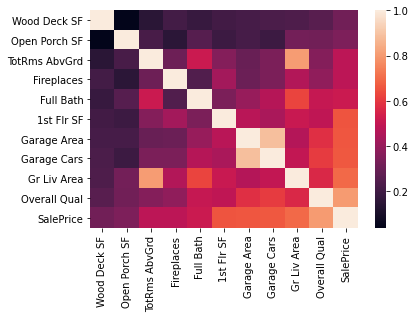

In [29]:
sns.heatmap(corrmat)
plt.show()

In [30]:
#odvržemo stolpce, ki so med seboj kolinearni

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])

In [31]:
features = final_corr_cols.drop(['SalePrice']).index
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [32]:
target = 'SalePrice'

In [33]:
test[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 92.0 KB


In [34]:
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wood Deck SF   1470 non-null   int64  
 1   Open Porch SF  1470 non-null   int64  
 2   Fireplaces     1470 non-null   int64  
 3   Full Bath      1470 non-null   int64  
 4   1st Flr SF     1470 non-null   int64  
 5   Garage Area    1469 non-null   float64
 6   Gr Liv Area    1470 non-null   int64  
 7   Overall Qual   1470 non-null   int64  
 8   SalePrice      1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB


In [36]:
clean_test = test[final_corr_cols.index].dropna()

### Train And Test Model

In [37]:
lr = LinearRegression()
lr.fit(train[features], train[target])

test_predictions = lr.predict(clean_test[features])

test_mse = mean_squared_error(test_predictions, clean_test[target])

test_rmse = np.sqrt(test_mse)

print(test_rmse)

41032.026120197705


### Removing Low Variance Features

In [38]:
unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())

In [39]:
unit_train.describe()

Wood Deck SF  Open Porch SF   Fireplaces    Full Bath   1st Flr SF  \
count   1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean       0.138207       0.084983     0.198402     0.391438     0.335449   
std        0.181836       0.118058     0.215846     0.136459     0.160668   
min        0.000000       0.000000     0.000000     0.000000     0.000000   
25%        0.000000       0.000000     0.000000     0.250000     0.211704   
50%        0.000000       0.047532     0.333333     0.500000     0.307229   
75%        0.251497       0.127971     0.333333     0.500000     0.434703   
max        1.000000       1.000000     1.000000     1.000000     1.000000   

       Garage Area  Gr Liv Area  Overall Qual  
count  1460.000000  1460.000000   1460.000000  
mean      0.318119     0.351245      0.567580  
std       0.142642     0.151916      0.156512  
min       0.000000     0.000000      0.000000  
25%       0.224798     0.238091      0.444444  
50%       0.322581     0.339274      0.555556  
75%       0.387097     0.429439      0.666667  
max       1.000000     1.000000      1.000000

In [40]:
sorted_vars = unit_train.var().sort_values()

In [41]:
sorted_vars

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [42]:
features = features.drop('Open Porch SF')

In [43]:
features

Index(['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual'],
      dtype='object')

### Final Model

In [44]:
lr = LinearRegression()
lr.fit(train[features], train[target])

LinearRegression()

In [45]:
test_predictions = lr.predict(clean_test[features])

test_mse = mean_squared_error(test_predictions, clean_test[target])

test_rmse_2 = np.sqrt(test_mse)

print(test_rmse_2)

40591.42702437715


## Overfitting

### Introduction

In [53]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("data/auto-mpg.data", sep='\s+', names=columns)

In [54]:
cars.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [55]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [56]:
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [57]:
filtered_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


### Bias and Variance

### Bias-variance tradeoff

<p><img alt="Imgur" src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png"></p>


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def train_and_test(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    lr = LinearRegression()
    lr.fit(features, target)
    predictions = lr.predict(features)
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

In [60]:
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

In [61]:
cyl_mse, cyl_var

(24.020179568155537, 36.74255887416014)

In [62]:
weight_mse, weight_var

(18.6766165974193, 42.08612184489639)

### Multivariate models

In [63]:
one_mse, one_var = train_and_test(["cylinders"])
one_mse, one_var

(24.020179568155537, 36.74255887416014)

In [64]:
two_mse, two_var = train_and_test(["cylinders", "displacement"])
two_mse, two_var

(21.282057055586364, 39.48068138672938)

In [65]:
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
three_mse, three_var

(20.25295483971423, 40.509783602601395)

In [66]:
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
four_mse, four_var

(17.763860571843846, 42.998877870471794)

In [67]:
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
five_mse, five_var

(17.761396105406217, 43.00134233690936)

In [68]:
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
six_mse, six_var

(11.590170981415227, 49.172567460900346)

In [69]:
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
seven_mse, seven_var

(10.847480945000449, 49.91525749731511)

### Cross validation

In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

In [71]:
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        variance_values.append(var)
        mse_values.append(mse)
   
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)

In [72]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
two_mse, two_var

(21.584370274954374, 38.90252531375602)

In [73]:
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
three_mse, three_var

(20.655622193882955, 40.091287956606955)

In [74]:
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
four_mse, four_var

(18.169683239081888, 42.507643643644386)

In [75]:
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
five_mse, five_var

(18.283038517172056, 42.5987363001468)

In [76]:
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
six_mse, six_var

(12.099685425467118, 48.92824696771799)

In [77]:
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
seven_mse, seven_var

(11.41813197181206, 49.90431373098732)

### Plotting cross-validation error vs. cross-validation variance

In [78]:
import matplotlib.pyplot as plt

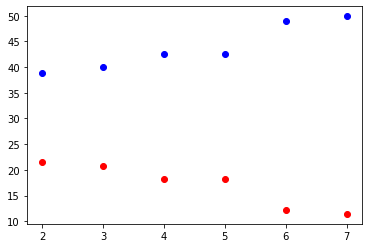

In [79]:
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

## Processing And Transforming Features


In [ ]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
print(train_null_counts)
df_no_mv = train[train_null_counts[train_null_counts==0].index]

### Categorical Features

In [ ]:
print(train['Utilities'].value_counts())

In [ ]:
print(train['Street'].value_counts())

In [ ]:
print(train['House Style'].value_counts())

In [ ]:
text_cols = df_no_mv.select_dtypes(include=['object']).columns
    
for col in text_cols:
    print(col+":", len(train[col].unique()))
    train.loc[:, col] = train.loc[:, col].astype('category')
    

### Dummy Coding

In [ ]:
dummy_cols = pd.DataFrame()
for col in text_cols:
    col_dummies = pd.get_dummies(train[col])
    train = pd.concat([train, col_dummies], axis=1)
    del train[col]

In [ ]:
train.head()

### Transforming Improper Numerical Features

In [ ]:
print(train[['Year Remod/Add', 'Year Built']])

In [ ]:
train['years_until_remod'] = train['Year Remod/Add'] - train['Year Built']

### Missing Values

In [ ]:
import pandas as pd

data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
df_missing_values = train[train_null_counts[(train_null_counts>0) & (train_null_counts<584)].index]

print(df_missing_values.isnull().sum())
print(df_missing_values.dtypes)

### Imputing Missing Values

In [ ]:
float_cols = df_missing_values.select_dtypes(include=['float'])



## Vaja: Predicting House Sale Prices

###  Introduction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")

In [ ]:
df.head()

In [ ]:
#df.info(memory_usage='deep')

In [ ]:
def transform_features(df):
    return df

In [ ]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [ ]:
def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    

    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    

    
    return rmse

In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

### Feature Engineering

In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")

In [ ]:
def transform_features(df):
    # skopiramo podatke v nov dataframe
    df_transformed = df.copy()
    
    # odstranimo vse stolpce ki imajo 5%+ procentov mankajočih vrednosti
    columns_before = df_transformed.shape[1]
    # DODAJ
    
    
    
    print(f'Dropping {columns_before - df_transformed.shape[1]} columns with 5%+ missing values.')
    
    # odstrnimo vse text stolpce, ki vsebujejo manjkajoče vrednosti
    columns_before = df_transformed.shape[1]
    # DODAJ
    
    
    
    
    print(f'Dropping {columns_before - df_transformed.shape[1]} object columns with any missing values.')
    
    # za vse numerične stolpce nadomestimo, manjkajoče vrednosti z najpogostejšo vrednostjo
    # DODAJ
        
        
    print(f'Filling {len(replacement_values_dict)} columns missing vlues with mode value. ')

    
    # preverimo da ni več manjkajočih vrednosti
    if df_transformed.isnull().sum().sum() == 0:
        print('All missing values removed.')
    else:
        raise ValueError('Dataframe is containing missing values.')
    
    # preuredimo nakatere stolpce, da dobimo bolj uporabne informacije
    # DODAJ
    
    
    
    # odstranimo še ostale stolpe, ki jih ne potrebujemo
    df_transformed = df_transformed.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Yr Sold", "Year Built", "Year Remod/Add"], axis=1)
    
    print(f'After transform_features ---> {df_transformed.shape[1]} columns in DF.')
    return df_transformed

In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

### Feature Selection

In [ ]:
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [ ]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    # odstranimo tiste vrednsoti, ki imajo korelacijo manjšo od 0.4
    columns_before = df.shape[1]
    # DODAJ
   


    print(f'Dropping {columns_before - df.shape[1]} numeric columns with correlation less then {coeff_threshold}. Current: {df.shape[1]}')
        
    # stolpci ki so primerni za pretvorbo v kategorije
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # izberemo stolpce, ki so še v df da jaih lahko pretvorimo v category 
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    # za vsak stolpec izračunamo število edinstvenih vrednosti
    # DODAJ
    
    columns_before = df.shape[1]
    # DODAJ
    print(f'Dropping {columns_before - df.shape[1]} object columns with more then {uniq_threshold} unique values. Current: {df.shape[1]}')
    
    # pretvorimo v category in nato izračunamo dummie vrednosti za te stolpce
    # DODAJ
    
    # DODAJ
    print(f'After select_features ---> {df.shape[1]} columns with types: {df.dtypes.value_counts().to_dict()}')
    return df


In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10)
rmse = train_and_test(filtered_df)

rmse

### Train And Test

In [ ]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)

        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [ ]:
df = pd.read_csv("data/AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10)
rmse = train_and_test(filtered_df, k=4)

rmse

### Finding best result

In [ ]:
result_dict = {}



In [ ]:
print(result_dict)

In [ ]:
min(result_dict, key=result_dict.get)